# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.layers import *
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d galaxyh/kdd-cup-1999-data --unzip

 88% 77.0M/87.8M [00:00<00:00, 161MB/s]
100% 87.8M/87.8M [00:00<00:00, 136MB/s]


In [3]:
data = pd.read_csv('/content/kddcup.data.corrected')

In [4]:
data.shape

(4898430, 42)

# Data Maping

In [5]:

def load_data():
    
    f=open("/content/kddcup.names",'r')
    data=f.readlines()[1:]

    column_names=[]
    for line in data:
        column_names.append(line.split(':')[0])

    column_names.append('target')
    f.close()

    f=open("/content/training_attack_types","r")
    data=f.readlines()[:-1]

    attack_type_mapping={'normal':'normal'}
    for line in data:
        k,v=line.split()
        attack_type_mapping[k]=v

    f.close()

    temp=pd.read_csv('/content/kddcup.data.corrected',names=column_names)
    temp['target']=temp.target.apply(lambda r: attack_type_mapping[r[:-1]])
    
    return temp

In [6]:
data = load_data()
data.shape

(4898431, 42)

In [7]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal


# Data Cleaning

In [8]:
data.drop_duplicates(inplace=True)
data.drop(columns=['is_host_login'],axis = 'columns',inplace = True)
data.shape

(1074983, 41)

In [9]:
temp = data[(data['target'] == 'r2l') | (data['target']== 'u2r')].index

In [11]:
data.drop(temp , inplace=True)
data.shape

(1073932, 41)

# EDA

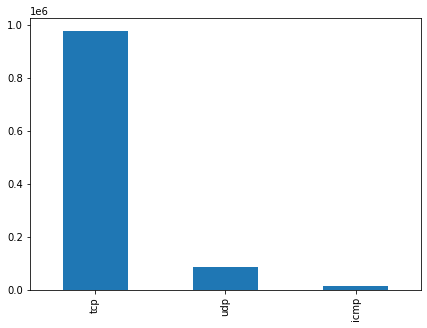

In [13]:
data['protocol_type'].value_counts().plot(kind = 'bar',figsize=(7,5))

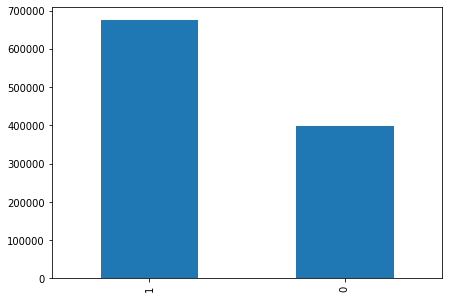

In [14]:
data['logged_in'].value_counts().plot(kind = 'bar',figsize=(7,5))

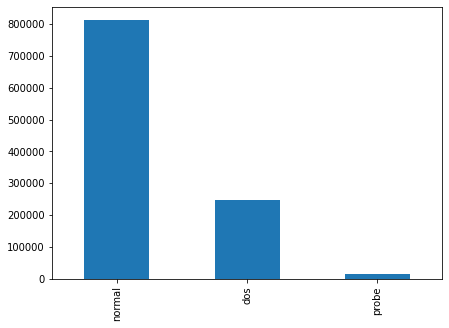

In [15]:
data['target'].value_counts().plot(kind = 'bar',figsize=(7,5))

In [16]:
data['target'].value_counts()


normal    812814
dos       247267
probe      13851
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


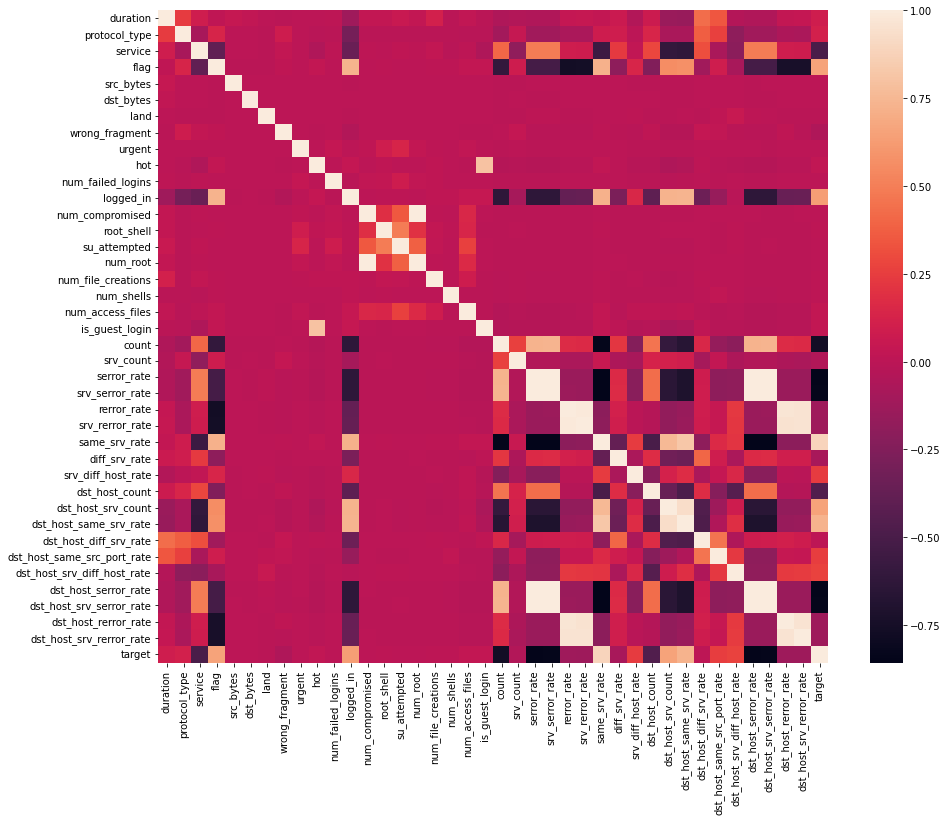

In [46]:
df = data.copy()
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()

In [18]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

# Data Pre-Processing

In [19]:
print(data.shape)
le = preprocessing.LabelEncoder()
data['protocol_type'] =le.fit_transform(data['protocol_type'])
data['service']=le.fit_transform(data['service'])
data['flag']=le.fit_transform(data['flag'])
data['target'] = le.fit_transform(data['target'])
print(data.shape)

(1073932, 41)
(1073932, 41)


In [44]:
751752 * 40

30070080

In [20]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,1,24,9,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1
1,0,1,24,9,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1
2,0,1,24,9,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,1
3,0,1,24,9,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,1
4,0,1,24,9,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,1


# Data Splitting

In [21]:
y = data['target']
X = data.drop(['target'], axis = 'columns')

sc = MinMaxScaler()
X = sc.fit_transform(X)

X = X.reshape(-1,8,5,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(751752, 8, 5, 1) (322180, 8, 5, 1)
(751752,) (322180,)


In [22]:
y_test = np.array(tf.one_hot(y_test,depth = 3,dtype ='int64'))
y_train = np.array(tf.one_hot(y_train,depth = 3,dtype ='int64'))

# CNN Model

In [23]:
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [24]:
model = Sequential()

model.add(layers.Conv2D(32,(2,2),padding='Same',activation='relu',input_shape=(8,5,1)))
model.add(layers.Conv2D(64,(2,2),padding='Same',activation='relu'))
model.add(layers.MaxPooling2D((2,2), padding='same'))

model.add(layers.Conv2D(128,(2,2),padding='Same',activation='relu'))
model.add(layers.MaxPooling2D((2,2), padding='same'))

model.add(Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(3,'softmax'))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 5, 32)          160       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 5, 64)          8256      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 3, 64)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 3, 128)         32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0

In [27]:
cnn_history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size = 64)

Epoch 1/5
11747/11747 [==============================] - 241s 21ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0029 - val_accuracy: 0.9990
Epoch 2/5
11747/11747 [==============================] - 267s 23ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 3/5
11747/11747 [==============================] - 243s 21ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 4/5
11747/11747 [==============================] - 241s 21ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 5/5
11747/11747 [==============================] - 265s 23ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9995


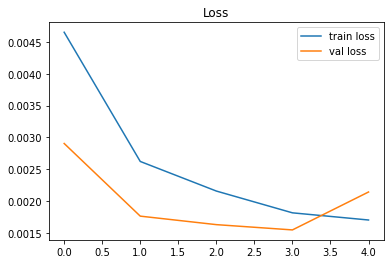

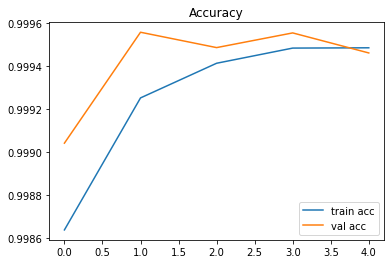

In [28]:
plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(cnn_history.history['accuracy'], label='train acc')
plt.plot(cnn_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

# Evaluation

In [29]:
cnn_auc = model.evaluate(X_test,y_test)

10069/10069 [==============================] - 45s 4ms/step - loss: 0.0021 - accuracy: 0.9995


In [30]:
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred,axis = 1)


In [37]:
test_labels = np.array(y_test)
test_labels = np.argmax(test_labels,axis = 1)
test_labels

array([1, 1, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

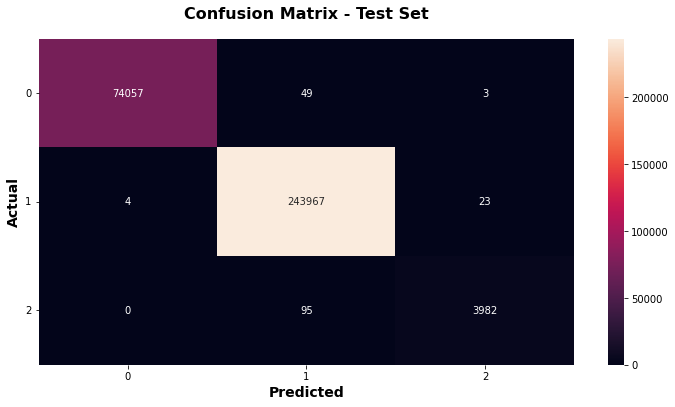

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74109
           1       1.00      1.00      1.00    243994
           2       0.99      0.98      0.99      4077

    accuracy                           1.00    322180
   macro avg       1.00      0.99      0.99    322180
weighted avg       1.00      1.00      1.00    322180



# Random Forest

In [40]:
y = data['target']
X = data.drop(['target'], axis = 'columns')

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)  

(751752, 40) (322180, 40)
(751752,) (322180,)


In [41]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier()
clfr.fit(X_train, y_train)

y_test_pred = clfr.predict(X_test)


print("Train Accuracy is:", clfr.score(X_train, y_train))
print("Test Accuracy is:", clfr.score(X_test, y_test))

Train Accuracy is: 0.9999747257074142
Test Accuracy is: 0.9998075609907505


# Evaluation

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

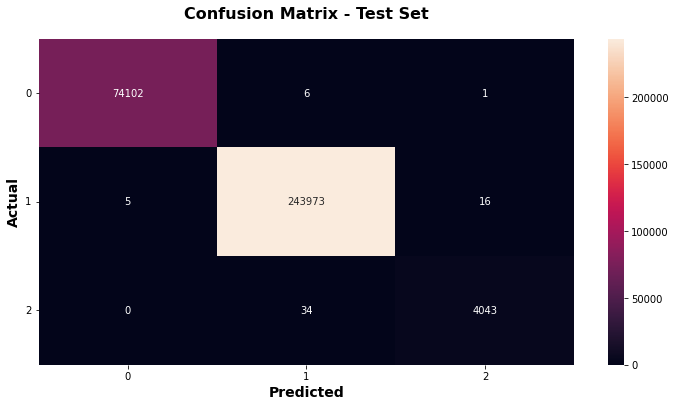

In [42]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    y_test,
    y_test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [43]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74109
           1       1.00      1.00      1.00    243994
           2       1.00      0.99      0.99      4077

    accuracy                           1.00    322180
   macro avg       1.00      1.00      1.00    322180
weighted avg       1.00      1.00      1.00    322180

